In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [43]:
# otherwise we're using at lease version 0.18
from sklearn.model_selection import train_test_split


In [44]:
df = pd.read_csv("diabetes.csv",delimiter=',')

In [45]:
x=df
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
3498,2,109,92,0,0,42.7,0.845,54,0
3499,1,95,66,13,38,19.6,0.334,25,0
3500,4,146,85,27,100,28.9,0.189,27,0
3501,2,100,66,20,90,32.9,0.867,28,1


In [46]:
print(df.isnull().sum().sum())
print(df.info())
df.describe()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3503 entries, 0 to 3502
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               3503 non-null   int64  
 1   Glucose                   3503 non-null   int64  
 2   BloodPressure             3503 non-null   int64  
 3   SkinThickness             3503 non-null   int64  
 4   Insulin                   3503 non-null   int64  
 5   BMI                       3503 non-null   float64
 6   DiabetesPedigreeFunction  3503 non-null   float64
 7   Age                       3503 non-null   int64  
 8   Outcome                   3503 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 246.4 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,3503.000000,3503.000000,3503.000000,3503.000000,3503.000000,3503.000000,3503.000000,3503.000000,3503.000000
mean,3.759349,120.823294,69.022838,20.734799,79.656580,32.043848,0.474007,33.170996,0.342278
std,3.323769,32.208184,19.291670,16.049010,112.567244,8.082460,0.329446,11.772624,0.474540
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.300000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,129.000000,36.600000,0.629000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [47]:
print("Number of 0's for Glucose:", df['Glucose'].isin([0]).sum())
print("Number of 0's for Blood Pressure:", df['BloodPressure'].isin([0]).sum())
print("Number of 0's for Skin Thickness:", df['SkinThickness'].isin([0]).sum())
print("Number of 0's for Insulin:", df['Insulin'].isin([0]).sum())
print("Number of 0's for BMI:", df['BMI'].isin([0]).sum())

Number of 0's for Glucose: 24
Number of 0's for Blood Pressure: 161
Number of 0's for Skin Thickness: 1018
Number of 0's for Insulin: 1690
Number of 0's for BMI: 52


In [48]:
glucose = df['Glucose'].isin([0]).sum() / 3503*100
print("Percentage of missing data for Glocuse: %.2f" % glucose)

bloodpressure = df['BloodPressure'].isin([0]).sum() / 3503*100
print("Percentage of missing data for Blood Pressure: %.2f" % bloodpressure)

skinthickness = df['SkinThickness'].isin([0]).sum() / 3503*100,
print("Percentage of missing data for Skin Thickness: %.2f" % skinthickness)

insulin =df['Insulin'].isin([0]).sum() / 3503*100
print("Percentage of missing data for Insulin: %.2f" % insulin)

bmi = df['BMI'].isin([0]).sum() / 3503*100
print("Percentage of missing data for BMI: %.2f" % bmi)


Percentage of missing data for Glocuse: 0.69
Percentage of missing data for Blood Pressure: 4.60
Percentage of missing data for Skin Thickness: 29.06
Percentage of missing data for Insulin: 48.24
Percentage of missing data for BMI: 1.48


In [49]:
diabetes_clean = df.copy()

In [50]:
diabetes_clean['Glucose'] = diabetes_clean['Glucose'].replace(0,df['Glucose'].mean())
diabetes_clean['BloodPressure'] = diabetes_clean['BloodPressure'].replace(0,df['BloodPressure'].mean())
diabetes_clean['SkinThickness'] = diabetes_clean['SkinThickness'].replace(0,df['SkinThickness'].mean())
diabetes_clean['Insulin'] = diabetes_clean['Insulin'].replace(0,df['Insulin'].mean())
diabetes_clean['BMI'] = diabetes_clean['BMI'].replace(0,df['BMI'].mean())

In [51]:
diabetes_clean['Pregnancies'].values[diabetes_clean['Pregnancies'] > 0] = 1
# Changing number of pregancies to a binary variable. Where any pregnancy > 0 is returned a value of 1. Since no pregnancies is
# already encoded as 0 this does not need to be changed


In [52]:
diabetes_clean.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,3503.000000,3503.000000,3503.000000,3503.000000,3503.000000,3503.000000,3503.000000,3503.000000,3503.000000
mean,0.849558,121.651087,72.195169,26.760498,118.086389,32.519520,0.474007,33.170996,0.342278
std,0.357556,30.604516,11.961443,9.811929,90.177886,7.060673,0.329446,11.772624,0.474540
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,20.734799,79.656580,27.500000,0.245000,24.000000,0.000000
50%,1.000000,117.000000,72.000000,23.000000,79.656580,32.043848,0.376000,29.000000,0.000000
75%,1.000000,141.000000,80.000000,32.000000,129.000000,36.600000,0.629000,40.000000,1.000000
max,1.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


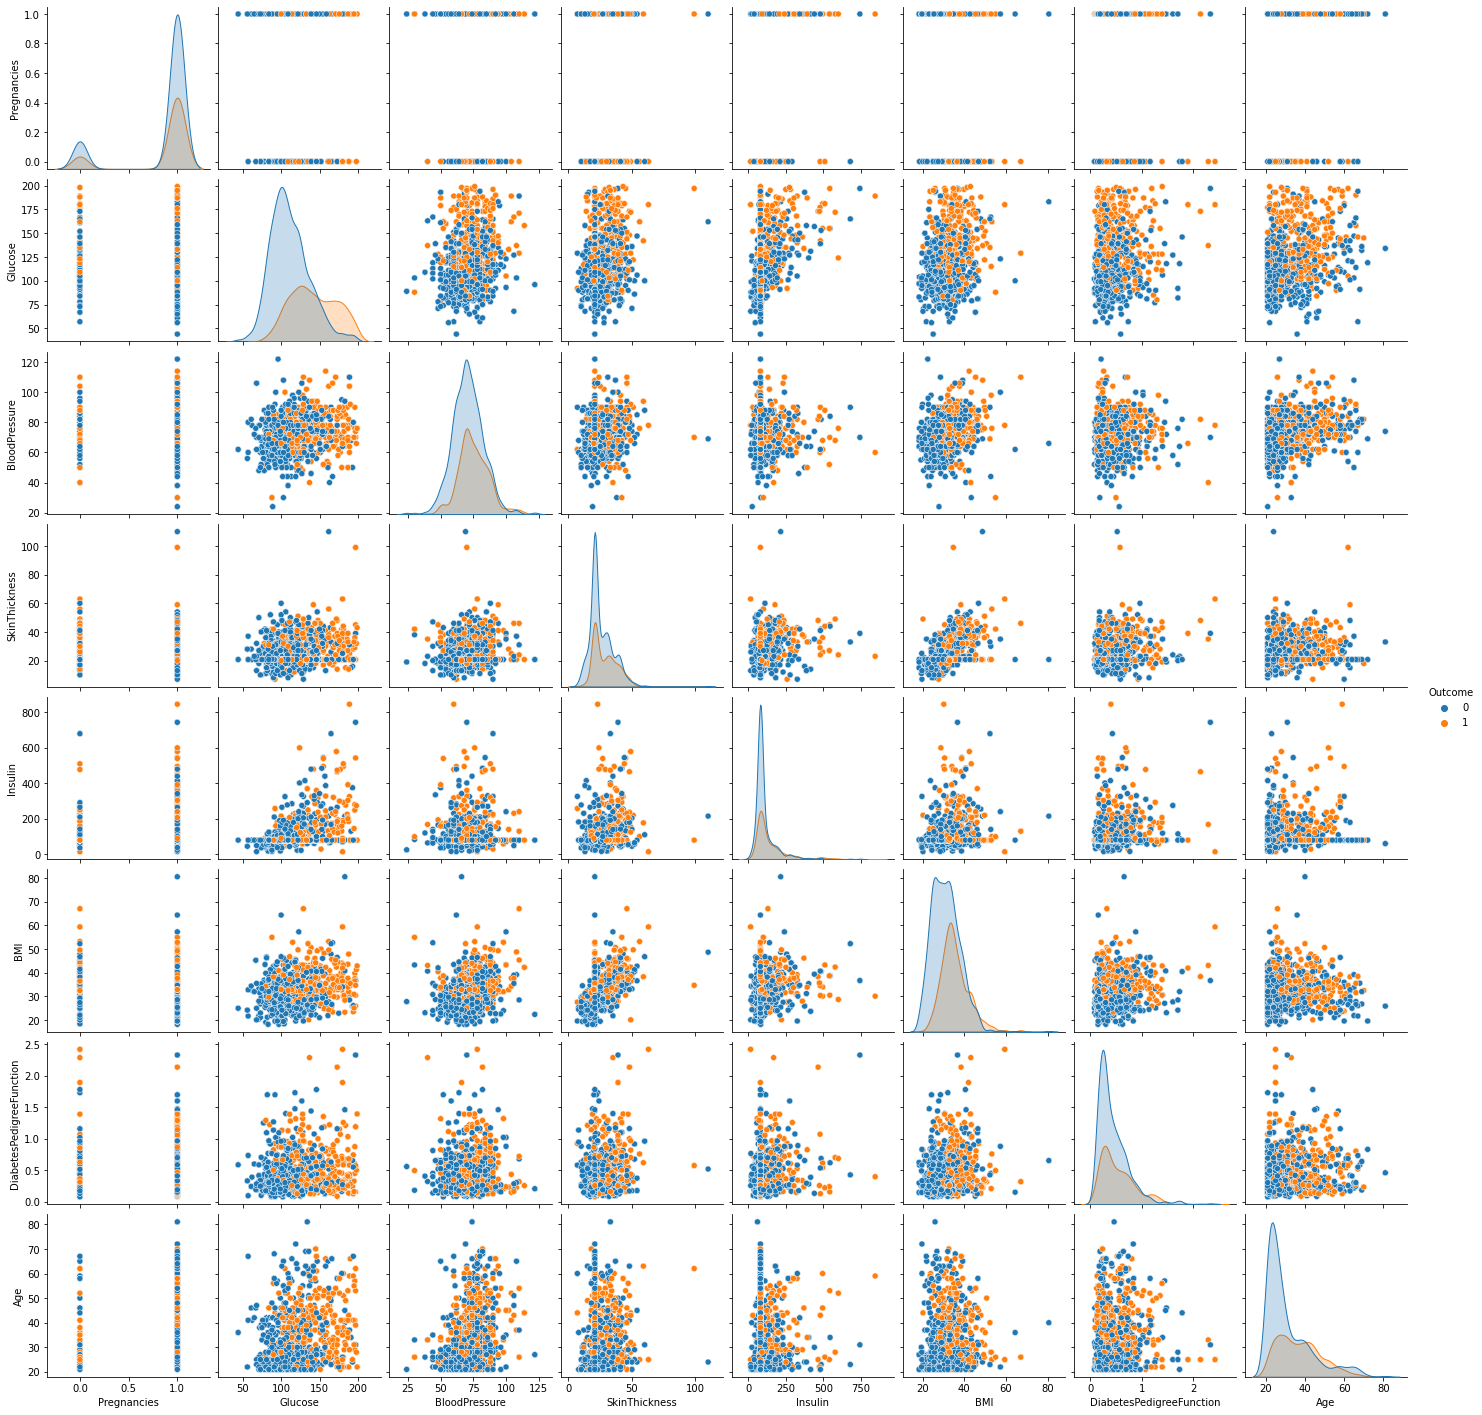

In [53]:
sns.pairplot(diabetes_clean, hue="Outcome")
plt.show()

In [54]:
diabetes_clean['Outcome'].value_counts()

0    2304
1    1199
Name: Outcome, dtype: int64

In [55]:
diabetes_clean['Pregnancies'].value_counts()

1    2976
0     527
Name: Pregnancies, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split

X = diabetes_clean.iloc[:, :-1]
y = diabetes_clean.iloc[:, [-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) 

In [57]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [58]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train.values.ravel())
y_predicted = model.predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_predicted))
confusion_matrix(y_test, y_predicted)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       709
           1       0.68      0.60      0.64       342

    accuracy                           0.78      1051
   macro avg       0.75      0.73      0.74      1051
weighted avg       0.77      0.78      0.77      1051



array([[613,  96],
       [138, 204]])

In [60]:
# Accuracy Score
score = round(accuracy_score(y_test, y_predicted),4)*100
print("Accuracy on test set: {}%".format(score))


Accuracy on test set: 77.74%


In [69]:
train_pred=model.predict(X_train)
a=round(accuracy_score(y_train,train_pred),2)*100
print("Accuracy on trainning set: {}%".format(a))

Accuracy on trainning set: 78.0%


In [70]:
import pickle
# Firstly we will be using the dump() function to save the model using pickle
saved_model = pickle.dumps(model)
# Then we will be loading that saved model
model_from_pickle = pickle.loads(saved_model)
# Then we will be loading that saved model
model_from_pickle = pickle.loads(saved_model)

In [71]:
a=int(input("enter no of pregnancies="))
b=float(input("Enter glucose level="))
c=float(input("Enter blood pressure  level="))
st=float(input("Enter skinthickness level="))
i=float(input("Enter insulin level="))
bmi=float(input("Enter bmi level="))
d=float(input("enter dpf="))
age=int(input("enter age="))
p=model_from_pickle.predict([[a,b,c,st,i,bmi,d,age]])
if p==0:
    print("great,you dont have diabetes")
else:
    print("you have diabetes, please consult a doctor")

enter no of pregnancies=1
Enter glucose level=85
Enter blood pressure  level=66
Enter skinthickness level=29
Enter insulin level=125
Enter bmi level=33
enter dpf=0.672
enter age=35
you have diabetes, please consult a doctor
